In [54]:
import torch
from torch import nn

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [55]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
# X = torch.arange(start,end,step)
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = X * weight  + bias
X, y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
         [

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, Y_train, X_test, Y_test
len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

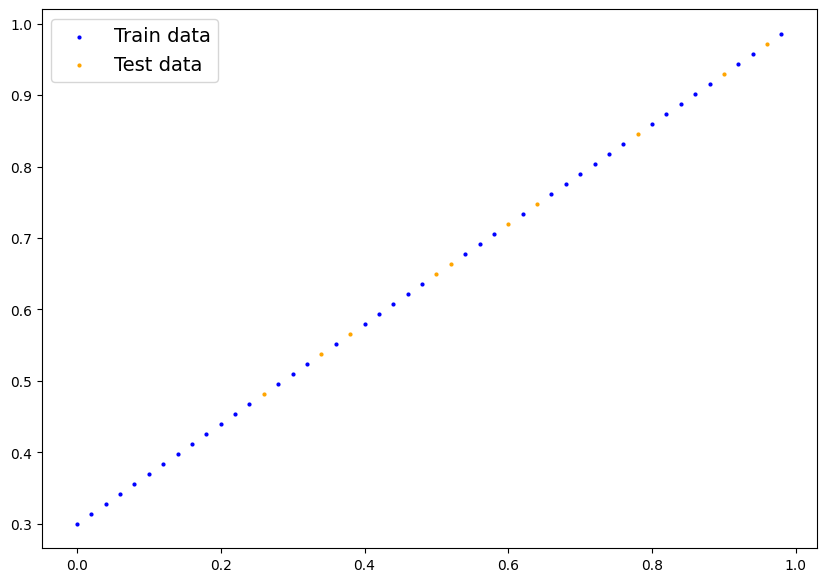

In [84]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None, pred_data=None, pred_labels=None):
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c='b', s=4, label='Train data')

    plt.scatter(test_data, test_labels, c='orange', s=4, label='Test data')

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

    if pred_data is not None and pred_labels is not None:
        plt.scatter(pred_data, pred_labels, c='black', s=4, label='Pred data 2')
    
    plt.legend(prop={'size': 14})


plot_predictions(
    train_data=X_train,
    train_labels=Y_train,
    test_data=X_test,
    test_labels=Y_test,
)

In [85]:
class LinearRegressionModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return  self.weight * x + self.bias

In [86]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [87]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [88]:
with torch.inference_mode():
    Y_pred = model_0(X_test)

Y_pred

tensor([[0.2163],
        [0.3914],
        [0.3308],
        [0.4318],
        [0.2433],
        [0.4520],
        [0.3039],
        [0.2972],
        [0.3443],
        [0.2568]])

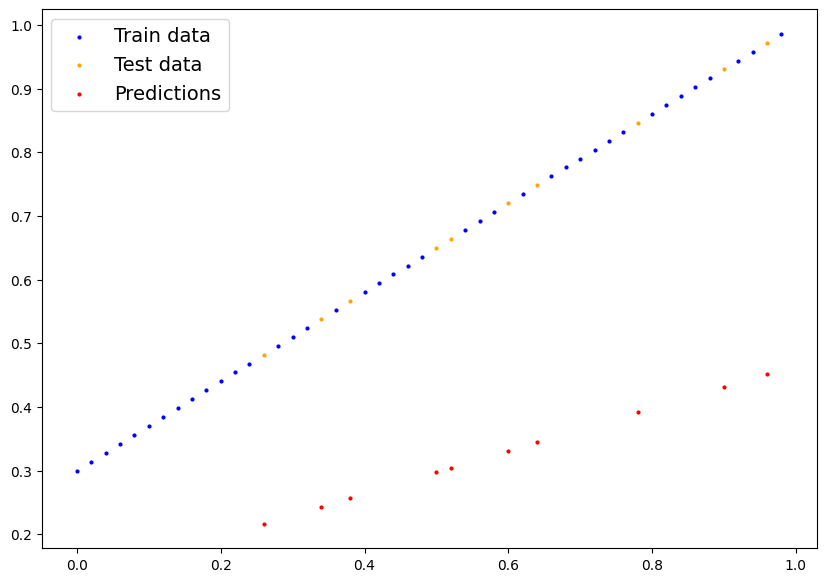

In [89]:
plot_predictions(
    train_data=X_train,
    train_labels=Y_train,
    test_data=X_test,
    test_labels=Y_test,
    predictions=Y_pred,
)

In [106]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)

In [112]:
epochs = 3000

for epoch in range(epochs):
    print(f'Epoch: {epoch}')

    model_0.train()
    
    Y_pred = model_0(X_train)

    loss = loss_fn(Y_pred, Y_train)
    print(f'  Loss: {loss}')

    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    optimizer.step()

    model_0.eval()

Epoch: 0
  Loss: 0.03628746420145035
Epoch: 1
  Loss: 0.036231450736522675
Epoch: 2
  Loss: 0.036175437271595
Epoch: 3
  Loss: 0.03611942380666733
Epoch: 4
  Loss: 0.036063410341739655
Epoch: 5
  Loss: 0.03600740805268288
Epoch: 6
  Loss: 0.035951387137174606
Epoch: 7
  Loss: 0.03589537367224693
Epoch: 8
  Loss: 0.03583936393260956
Epoch: 9
  Loss: 0.03578335791826248
Epoch: 10
  Loss: 0.03572734072804451
Epoch: 11
  Loss: 0.03567132726311684
Epoch: 12
  Loss: 0.03561531379818916
Epoch: 13
  Loss: 0.03555930033326149
Epoch: 14
  Loss: 0.035503286868333817
Epoch: 15
  Loss: 0.03544727712869644
Epoch: 16
  Loss: 0.03539125993847847
Epoch: 17
  Loss: 0.035335250198841095
Epoch: 18
  Loss: 0.03527924045920372
Epoch: 19
  Loss: 0.03522322699427605
Epoch: 20
  Loss: 0.03516721352934837
Epoch: 21
  Loss: 0.0351112000644207
Epoch: 22
  Loss: 0.035055194050073624
Epoch: 23
  Loss: 0.03499917313456535
Epoch: 24
  Loss: 0.03494315966963768
Epoch: 25
  Loss: 0.03488714620471001
Epoch: 26
  Loss: 0

In [113]:
X_pred2 = torch.add(torch.rand(12), 2).unsqueeze(dim=1)
X_pred2 

tensor([[2.1637],
        [2.7025],
        [2.6790],
        [2.9155],
        [2.2418],
        [2.1591],
        [2.7653],
        [2.2979],
        [2.8035],
        [2.3813],
        [2.7860],
        [2.1115]])

In [114]:

with torch.inference_mode():
    Y_pred = model_0(X_test)
    Y_pred2 = model_0(X_pred2)

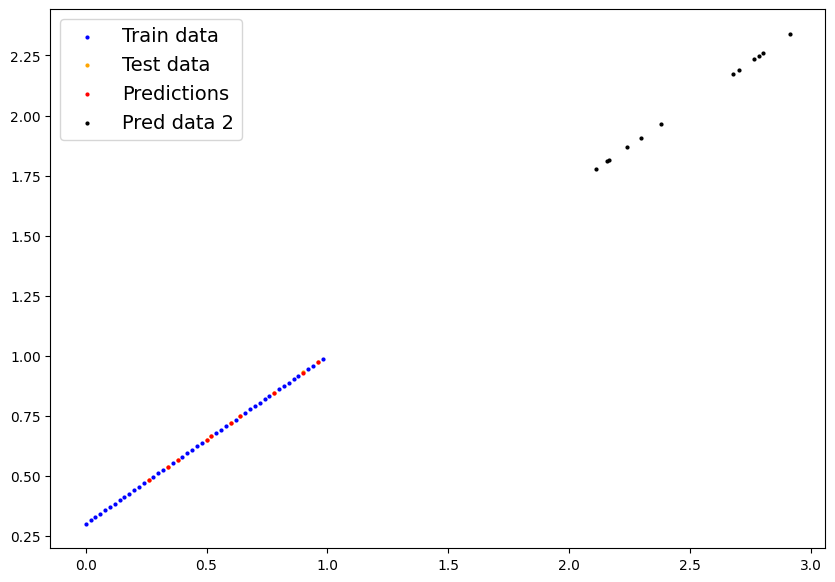

In [115]:
plot_predictions(
    train_data=X_train,
    train_labels=Y_train,
    test_data=X_test,
    test_labels=Y_test,
    predictions=Y_pred,
    pred_data=X_pred2,
    pred_labels=Y_pred2,
)